<a href="https://colab.research.google.com/github/HongEnJung/Kaggle/blob/main/House_Prices_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



```
- 데이터에서 중요한 컬럼
1. SalePrice: 주택의 판매 가격, 이 컬럼은 예측하려는 타겟 변수
2. OverallQual: 주택 전반적인 자질에 대한 평가 점수, 이 컬럼은 1부터 10까지의 값으로 이루어져 있으며, 높은 값일수록 더 좋은 자질을 가진 주택
3. GrLivArea: 지상 생활 면적, 이 컬럼은 평방 피트 단위로 이루어져 있으며, 주택의 크기를 나타내는 중요한 변수 중 하나
4. YearBuilt: 주택 건축 년도, 이 컬럼은 주택의 연식을 나타내는 중요한 변수 중 하나
5. GarageCars: 차고에 수용 가능한 차량 수, 이 컬럼은 차고의 크기와 관련이 있으며, 차량 수가 많을수록 주택의 가치가 높아질 가능성이 있음
6. Neighborhood: Ames의 지역 이름, 이 컬럼은 지역에 따른 부동산 시장의 차이를 고려할 때 중요한 변수 중 하나
```



In [99]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
#matplotlib inline

In [100]:
df_train = pd.read_csv('/content/drive/MyDrive/캐글/House Prices/train.csv')

In [101]:
#컬럼 조회
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [102]:
# First things first : analysing 'SalePrice'

In [103]:
# 주택 가격 조회
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

<Axes: xlabel='SalePrice', ylabel='Density'>

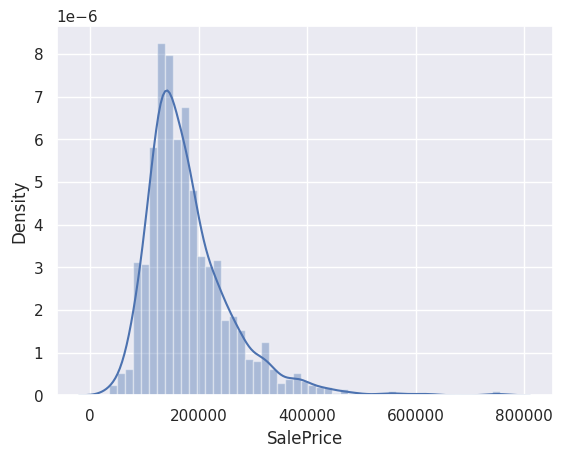

In [104]:
# 히스토그램
sns.distplot(df_train['SalePrice'])

In [105]:
# 왜도 계산(분포가 대칭인지 비대칭인지)
# 대칭 분포인 경우 0, 왼쪽 긴꼬리리 음수, 오른쪽 긴꼬리리 경우 양수
print('Skewness: %f' %df_train['SalePrice'].skew())

# 첨도 계산
# 분포의 꼬리 부분의 두께
# 정규분포와 같은 경우 3, 작으면 분포가 납작, 크면 분포가 뾰족
print('Kurtosis: %f' %df_train['SalePrice'].kurt()) 

Skewness: 1.882876
Kurtosis: 6.536282


,SalePrice,GrLivArea
SalePrice,1.000000,0.708624
GrLivArea,0.708624,1.000000


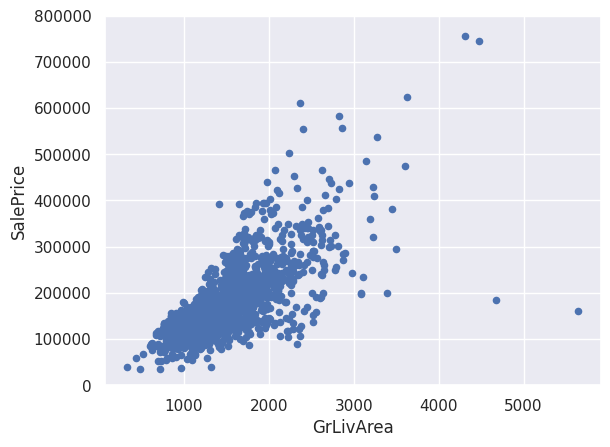

In [106]:
# GrLivArea: 지상 생활 면적, SalePrice: 주택의 판매 가격의 산점도
x='GrLivArea'
y='SalePrice'
data = pd.concat([df_train[y], df_train[x]], axis=1)
data.plot.scatter(x=x, y=y, ylim=(0,800000))
data.corr()

GrLivArea(지상생활면적)과 SalePrice(주택판매가격) 양의 상관관계를 보임 (0.70)

,SalePrice,TotalBsmtSF
SalePrice,1.000000,0.613581
TotalBsmtSF,0.613581,1.000000


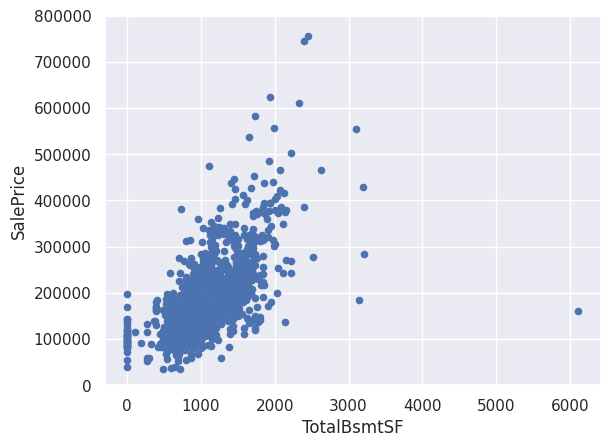

In [107]:
# TotalBsmtSF:지하실 총 면적,SalePrice: 주택의 판매 가격의 산점도
x='TotalBsmtSF'
y='SalePrice'
data = pd.concat([df_train[y], df_train[x]], axis=1)
data.plot.scatter(x=x, y=y, ylim=(0,800000))
data.corr()

TotalBmstSF(지하실 총 면적)과 SalePrcie(주택가격)은 양의 상관관계를 보임 (0.61)

(-0.5, 9.5, 0.0, 800000.0)

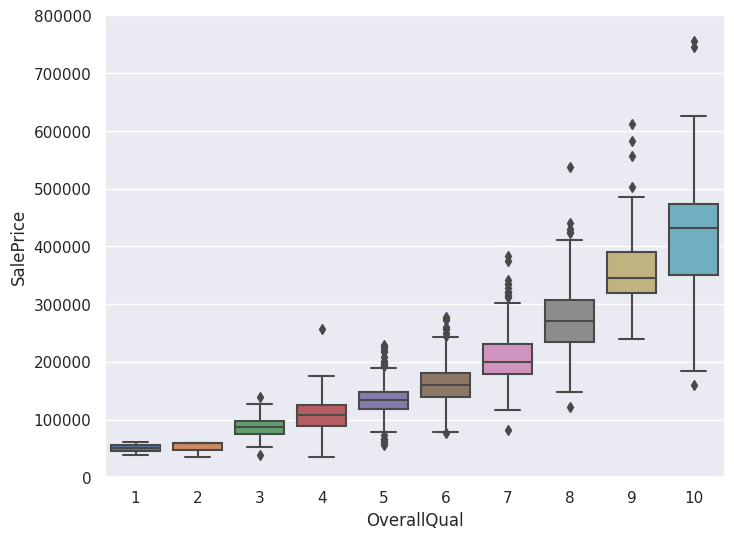

In [108]:
# OverallQual: 주택 전반적인 자질에 대한 평가 점수, SalePrice: 주택의 판매 가격의 BoxPlot
x='OverallQual'
y='SalePrice'
data = pd.concat([df_train[x], df_train[y]], axis=1)
# 가로 8인치, 세로 6인치 크기의 새로운 Figure 객체와 이에 속하는 Axes 객체를 생성
f, ax =plt.subplots(figsize = (8,6))
fig=sns.boxplot(x=x, y=y, data=data)
fig.axis(ymin=0, ymax=800000)

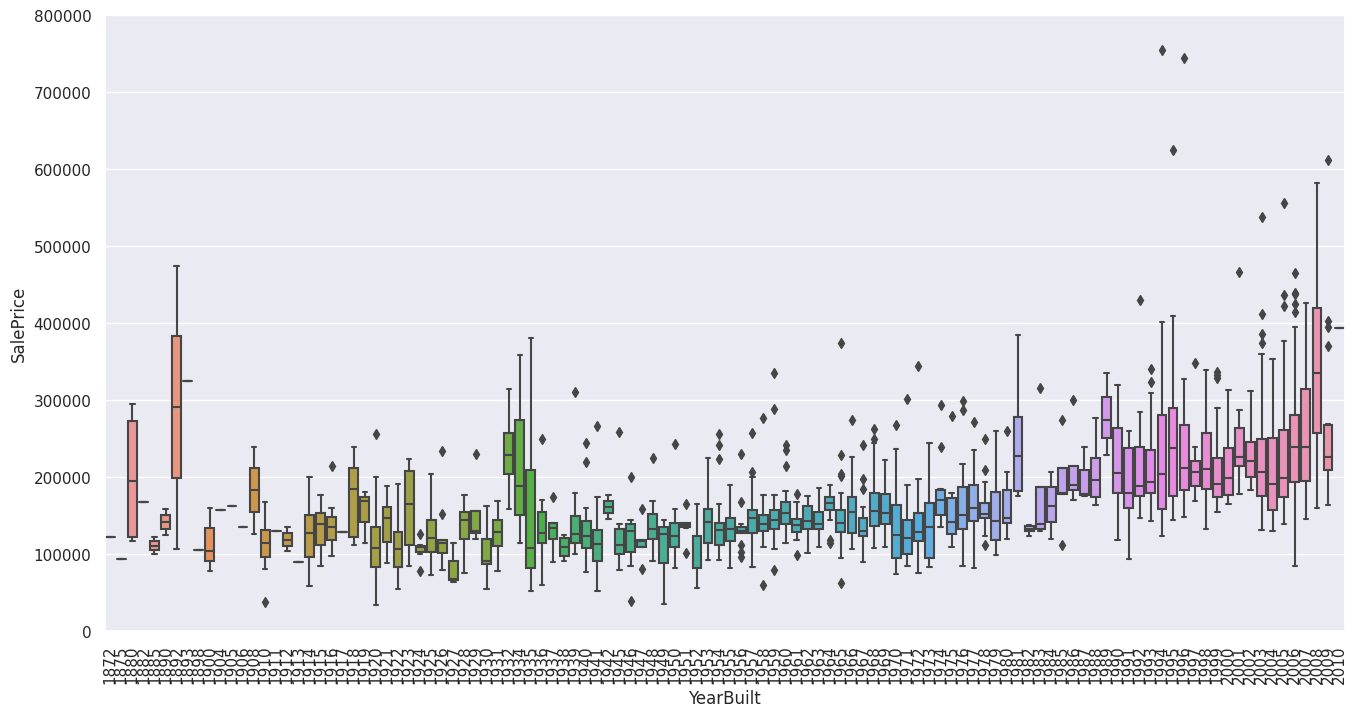

In [109]:
# YearBuilt: 주택 건축 년도,  SalePrice: 주택의 판매 가격의 BoxPlot
x='YearBuilt'
y='SalePrice'
data = pd.concat([df_train[x],df_train[y]], axis=1)

f, ax = plt.subplots(figsize = (16,8))
fig = sns.boxplot(x=x, y=y, data=data)
fig.axis(ymin=0, ymax = 800000)

# x축 눈금(label)을 90도 회전
plt.xticks(rotation =90);

<Axes: >

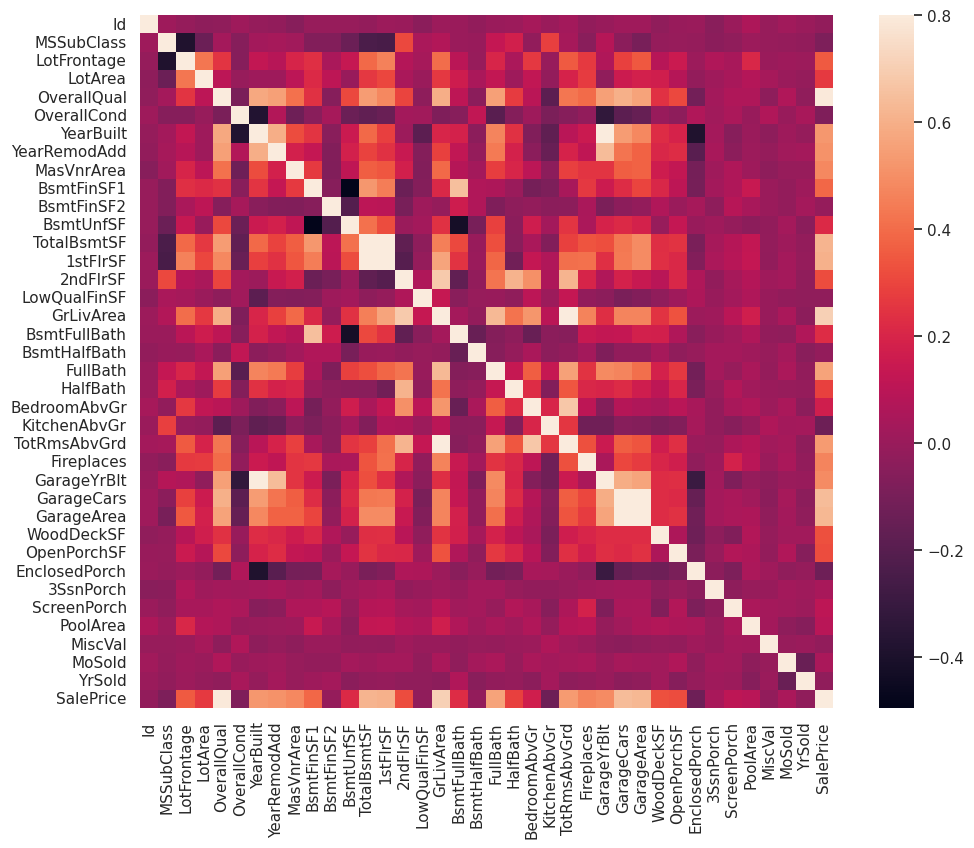

In [110]:
# correlation matrix
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.8, square=True) #'vmax' 인자는 색상 맵의 최대값

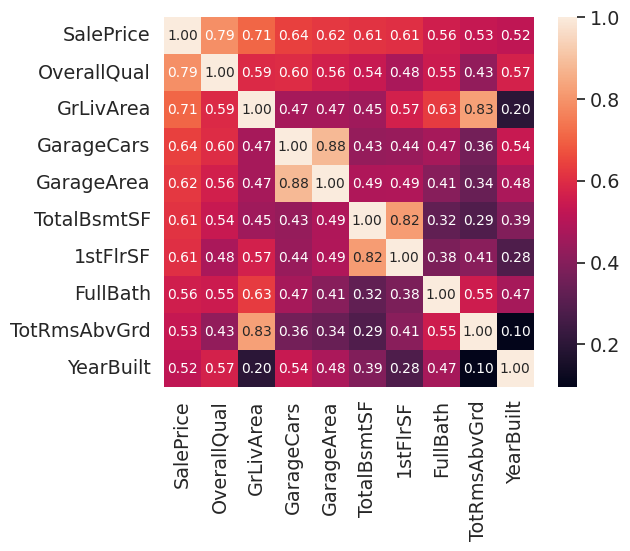

In [111]:
# SalePrice correlation matrix
k=10
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index #상위 10개
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt ='.2f',
                 annot_kws={'size':10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

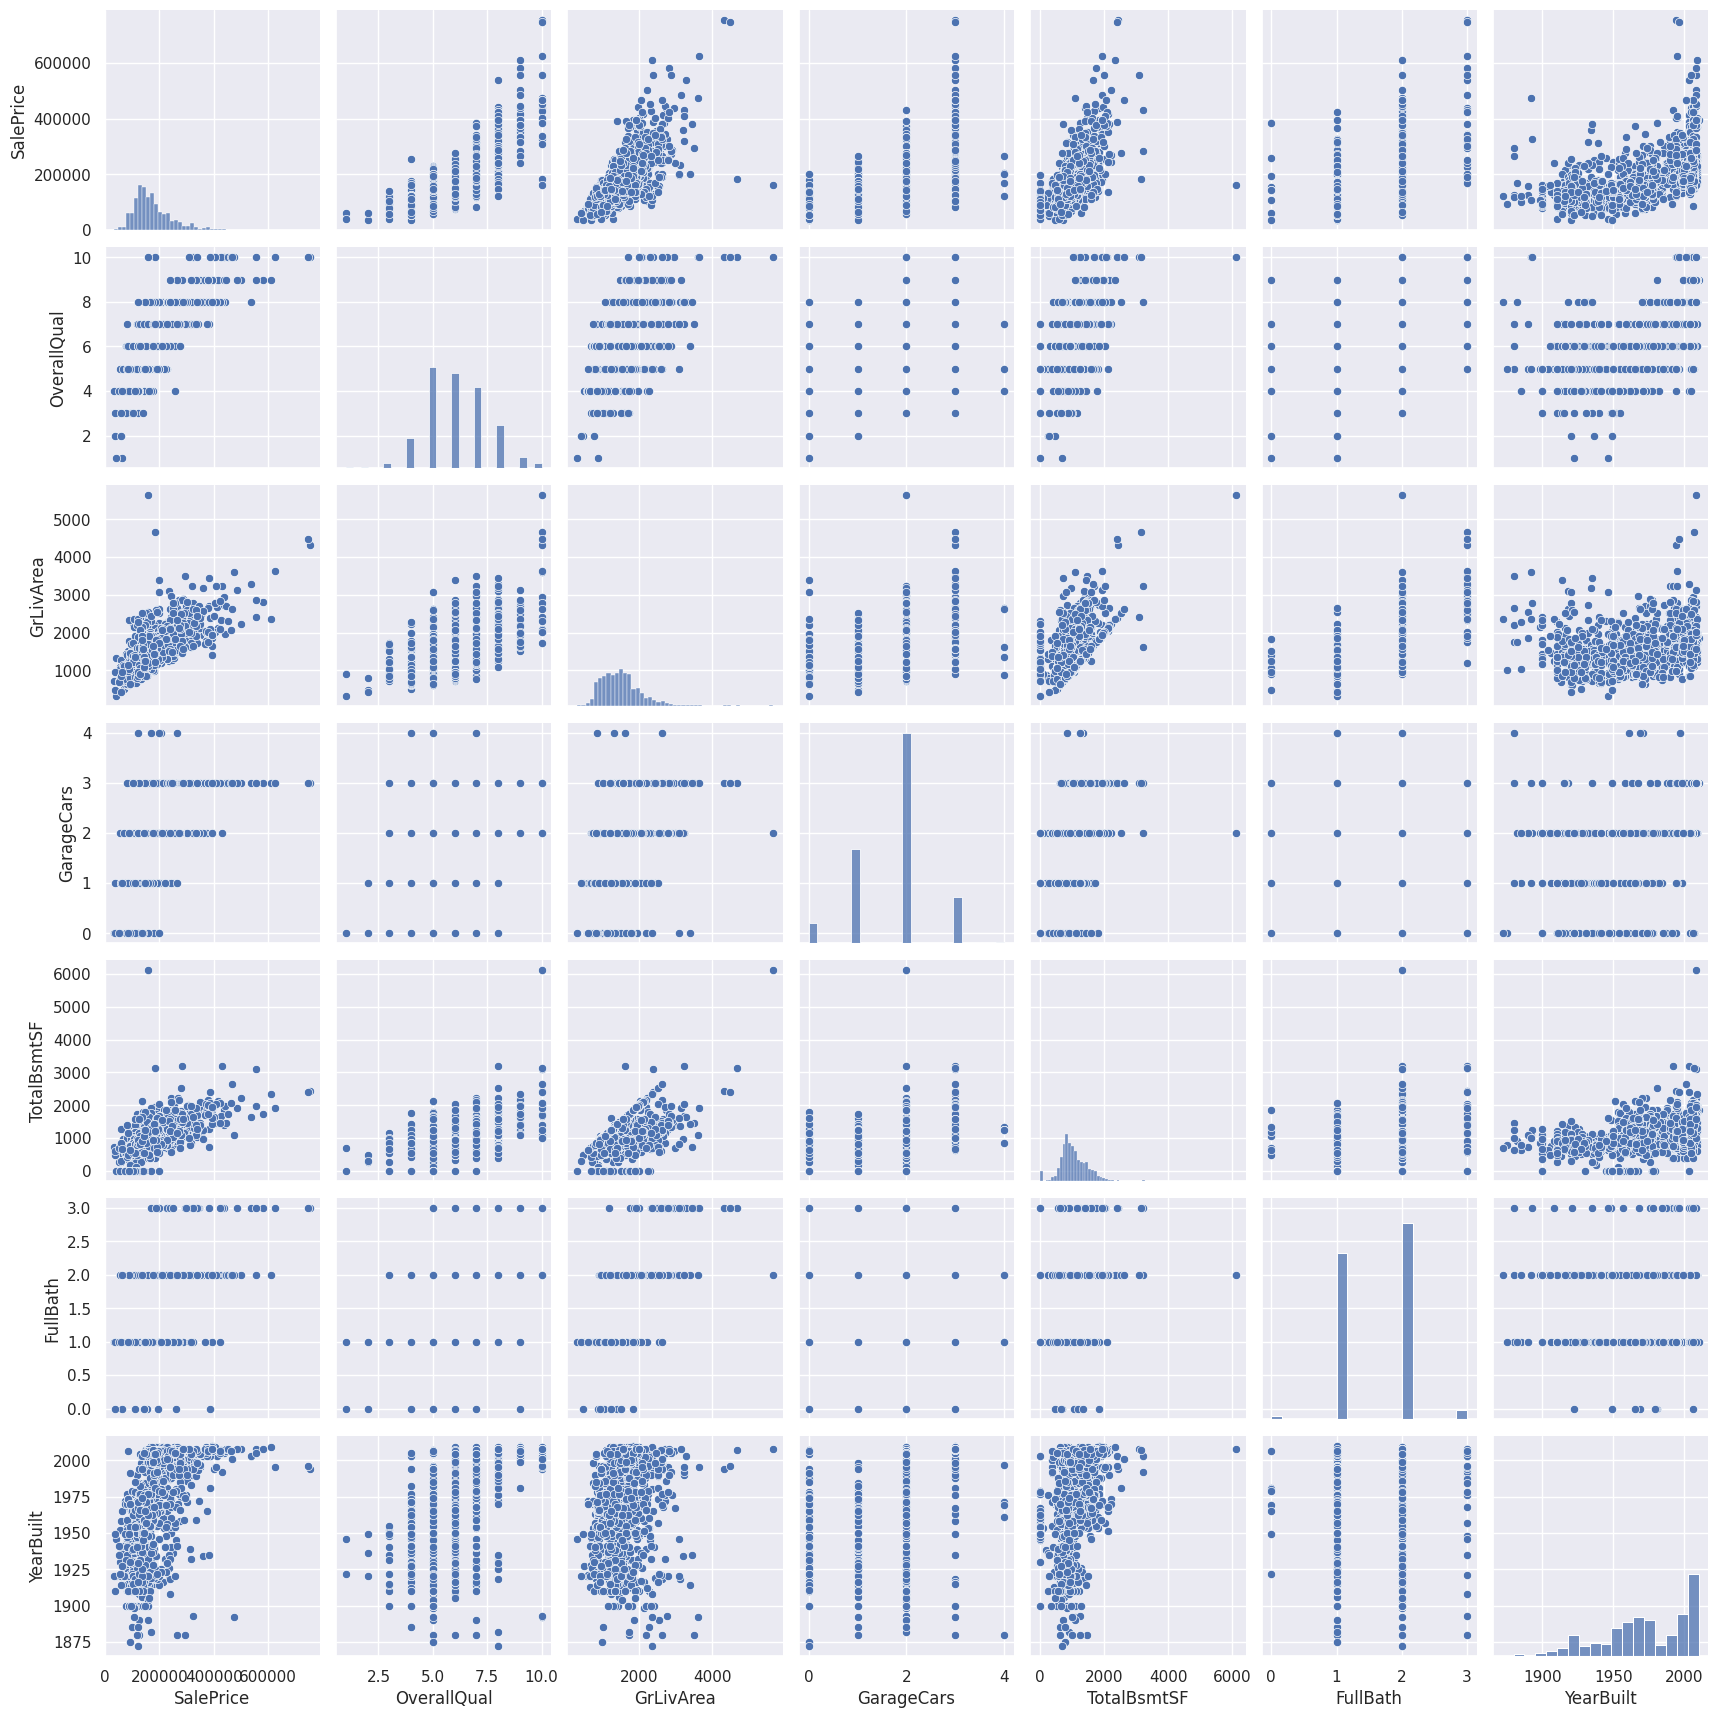

In [112]:
# scatterplot
sns.set()
cols=['SalePrice','OverallQual','GrLivArea','GarageCars','TotalBsmtSF','FullBath','YearBuilt']

# 데이터프레임의 모든 숫자형 열들 간의 산점도와 히스토그램을 한번에 그려주는 기능
sns.pairplot(df_train[cols], size=2.5)
plt.show()

In [113]:
# Missing data

In [114]:
# missing data
total = df_train.isnull().sum().sort_values(ascending = False)
percent = (df_train.isnull().sum() / df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total','Percent'])
missing_data.head(10)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
GarageCond,81,0.055479
GarageType,81,0.055479
GarageFinish,81,0.055479


In [115]:
# dealing with missing data
df_train = df_train.drop((missing_data[missing_data['Total'] > 1]).index, 1)
df_train = df_train.drop(df_train.loc[df_train['Electrical'].isnull()].index)
df_train.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 63, dtype: int64

In [116]:
df_train.isnull().sum().max()

0

In [117]:
# Univariate analysis

In [118]:
# Standardizing data
saleprice_scaled = StandardScaler().fit_transform(df_train['SalePrice'][:,np.newaxis])
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range=saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-1.83820775]
 [-1.83303414]
 [-1.80044422]
 [-1.78282123]
 [-1.77400974]
 [-1.62295562]
 [-1.6166617 ]
 [-1.58519209]
 [-1.58519209]
 [-1.57269236]]

outer range (high) of the distribution:
[[3.82758058]
 [4.0395221 ]
 [4.49473628]
 [4.70872962]
 [4.728631  ]
 [5.06034585]
 [5.42191907]
 [5.58987866]
 [7.10041987]
 [7.22629831]]


평균이 0 표준편차가 1인 정규분포로 변환 

In [119]:
saleprice_scaled.var()

1.0

In [120]:
# Bivariate analysis

<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

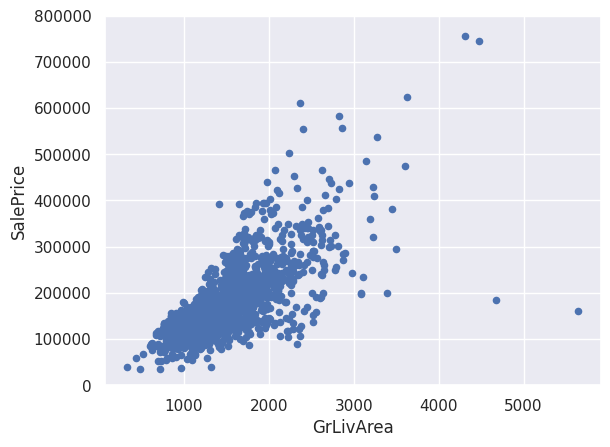

In [121]:
# bivariate analysis saleprice/grlivarea
x='GrLivArea'
y='SalePrice'
data = pd.concat([df_train[x],df_train[y]], axis=1)
data.plot.scatter(x=x, y=y, ylim = (0,800000))

In [122]:
# 이상점
df_train.sort_values(by=x, ascending=False)[:2]

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1298,1299,60,RL,63887,Pave,IR3,Bnk,AllPub,Corner,Gtl,...,0,0,0,480,0,1,2008,New,Partial,160000
523,524,60,RL,40094,Pave,IR1,Bnk,AllPub,Inside,Gtl,...,0,0,0,0,0,10,2007,New,Partial,184750


In [123]:
# deleting points
df_train = df_train.drop(df_train[df_train['Id']==1299].index)
df_train = df_train.drop(df_train[df_train['Id']==524].index)

<Axes: xlabel='TotalBsmtSF', ylabel='SalePrice'>

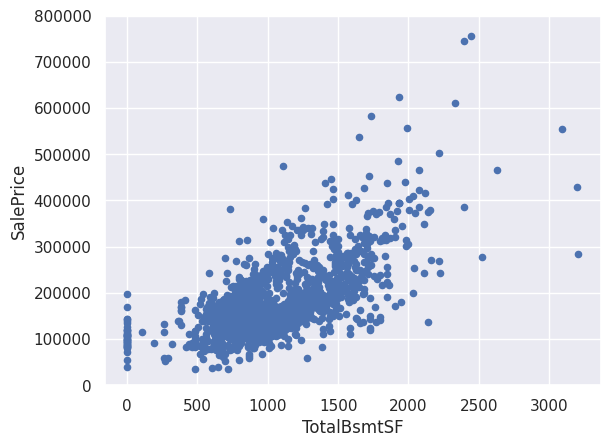

In [124]:
# bivariate analysis saleprice/TotalBsmtSF
x='TotalBsmtSF'
y='SalePrice'
data = pd.concat([df_train[x],df_train[y]], axis=1)
data.plot.scatter(x=x, y=y, ylim = (0,800000))

In [125]:
# 이상점
a=df_train.sort_values(by=x, ascending=False)[:3]
a[['TotalBsmtSF','Id']]

,TotalBsmtSF,Id
332,3206,333
496,3200,497
440,3094,441


In [126]:
df_train = df_train.drop(df_train[df_train['Id'] == 333].index)
df_train = df_train.drop(df_train[df_train['Id'] == 497].index)
df_train = df_train.drop(df_train[df_train['Id'] == 441].index)

In [127]:
#Getting hard core

```
1. Normality (정규성)
2. Homoscedasticity (등분산성)
3. Linearity (선형성)
4. Absence of correlated errors (상관된 오차의 부재)
```



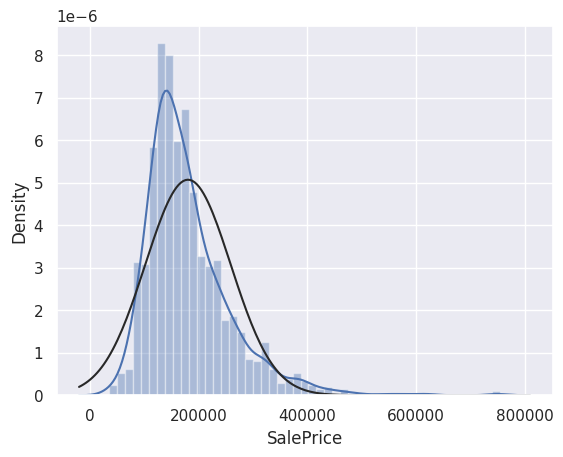

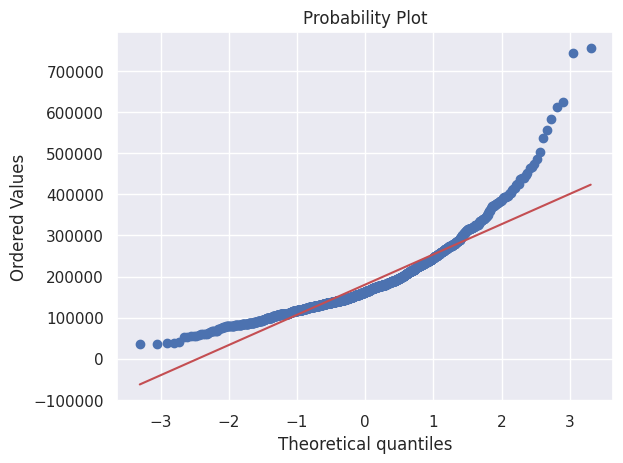

In [128]:
# histogram and normal prob plot
sns.distplot(df_train['SalePrice'], fit =norm)
fig=plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)

오른쪽 긴꼬리, 비선형 데이터


```
정규성 개선 방법
1. 변환(transformation)
 - 로그나 제곱근등의 변환을 적용
2. 아웃라이어(outlier) 제거 등
```



In [129]:
# applying log transformation
df_train['SalePrice'] = np.log(df_train['SalePrice'])

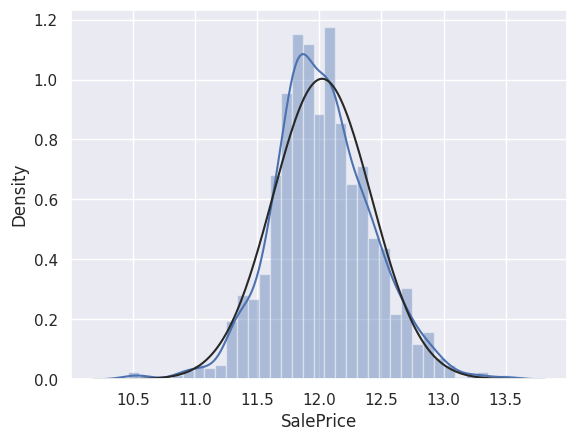

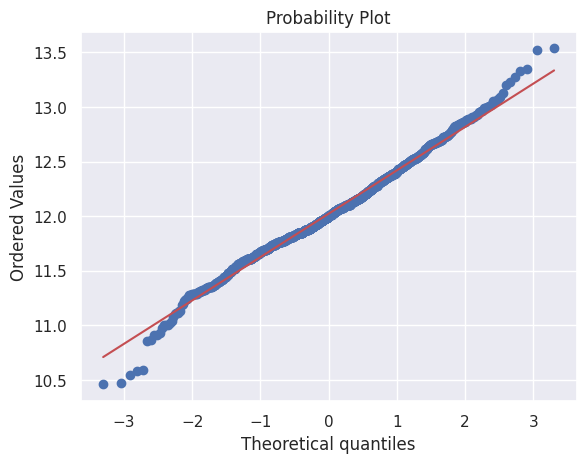

In [130]:
#transformed histogram and normal prob plot
sns.distplot(df_train['SalePrice'], fit=norm)

# 새로운 도화지 생성
fig = plt.figure()

res=stats.probplot(df_train['SalePrice'], plot=plt)

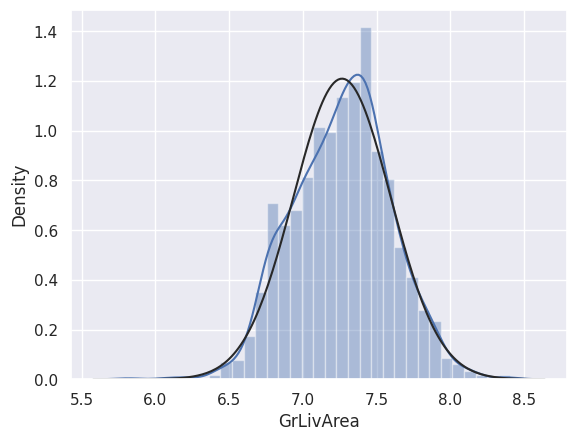

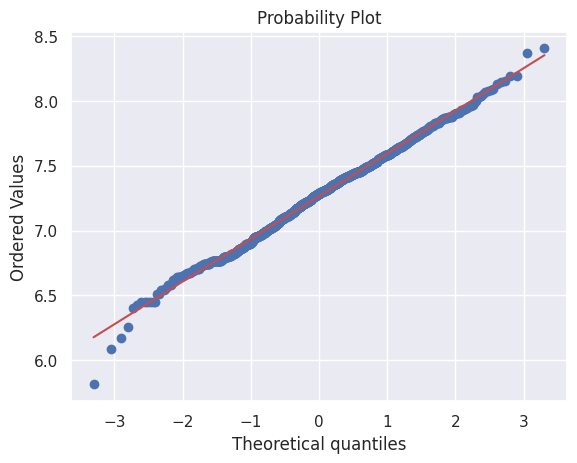

In [98]:
#data transformation
df_train['GrLivArea'] = np.log(df_train['GrLivArea'])

#transformed histogram and normal probability plot
sns.distplot(df_train['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['GrLivArea'], plot=plt)

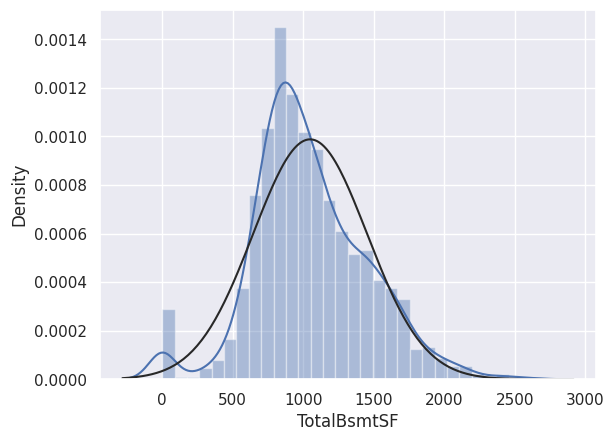

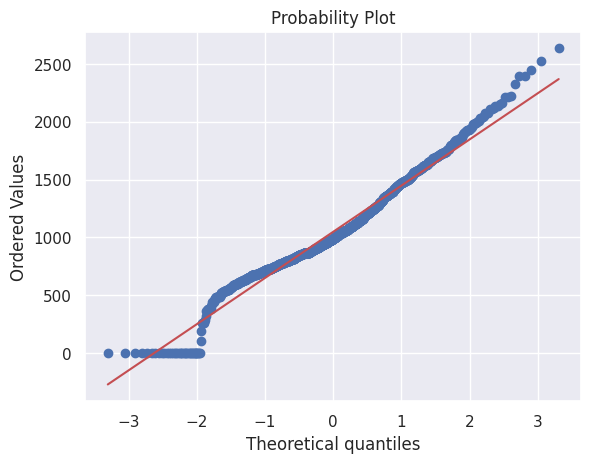

In [132]:
#histogram and normal probability plot
sns.distplot(df_train['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['TotalBsmtSF'], plot=plt)

0값이 존재하여 log 변환이 불가능

In [133]:
# create columns for new variable (one is enough because it's a binary categorical feature)
# if area > 0 it gets 1, for area == 0 it gets 0
df_train['HasBsmt'] = pd.Series(len(df_train['TotalBsmtSF']), index = df_train.index)
df_train['HasBsmt'] = 0
df_train.loc[df_train['TotalBsmtSF'] > 0 , 'HasBsmt'] = 1

In [134]:
# transform data
df_train.loc[df_train['HasBsmt'] ==1, 'TotalBsmtSF'] = np.log(df_train['TotalBsmtSF'])

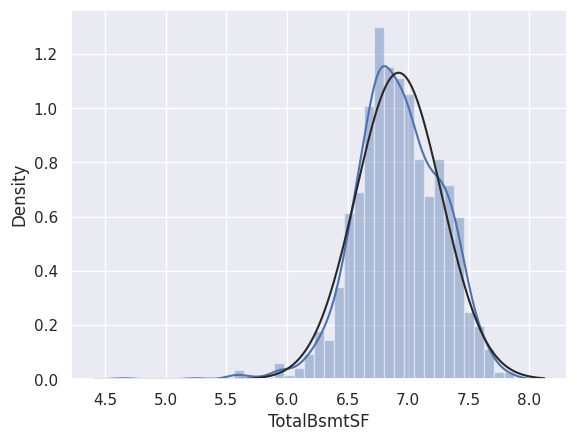

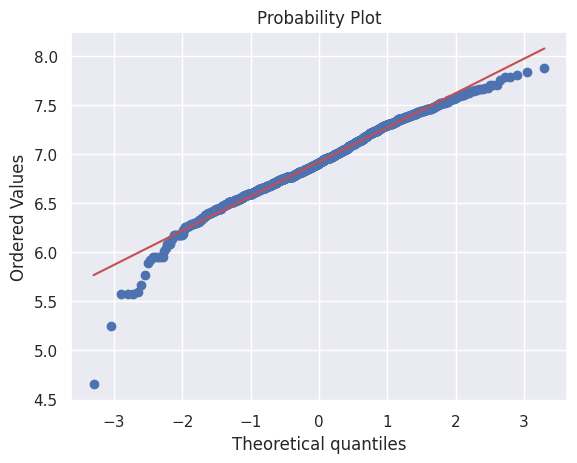

In [136]:
# histogram ans normal probabilty plot
sns.distplot(df_train[df_train['TotalBsmtSF'] > 0]['TotalBsmtSF'], fit = norm)
fig = plt.figure()
res = stats.probplot(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], plot =plt)

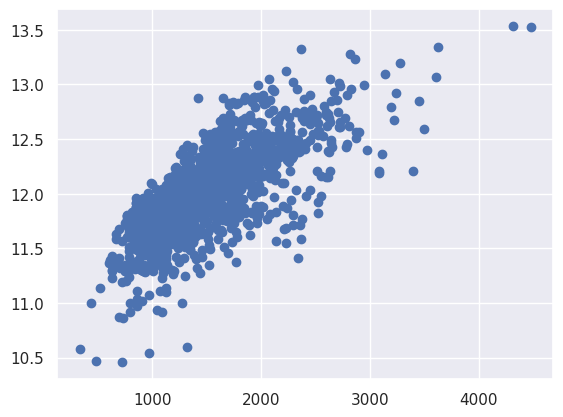

In [137]:
# homoscedasticity

# scatter plot
plt.scatter(df_train['GrLivArea'], df_train['SalePrice'])

In [140]:
x='GrLivArea'
y='SalePrice'
data = pd.concat([df_train[y], df_train[x]], axis=1)
data.corr()

,SalePrice,GrLivArea
SalePrice,1.000000,0.723584
GrLivArea,0.723584,1.000000


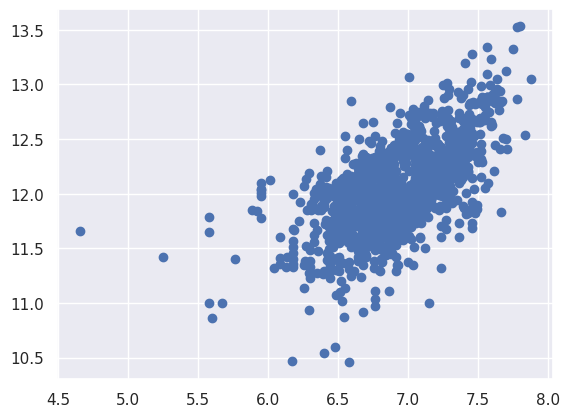

In [141]:
#scatter plot
plt.scatter(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], df_train[df_train['TotalBsmtSF']>0]['SalePrice'])

In [148]:
x=df_train[df_train['TotalBsmtSF']>0]['SalePrice']
y=df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF']
np.corrcoef(x,y)

array([[1.        , 0.60889177],
       [0.60889177, 1.        ]])

In [149]:
#convert categorical variable into dummy
df_train = pd.get_dummies(df_train)

In [150]:
df_train

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,8450,7,5,2003,2003,706,0,150,...,0,0,0,1,0,0,0,0,1,0
1,2,20,9600,6,8,1976,1976,978,0,284,...,0,0,0,1,0,0,0,0,1,0
2,3,60,11250,7,5,2001,2002,486,0,434,...,0,0,0,1,0,0,0,0,1,0
3,4,70,9550,7,5,1915,1970,216,0,540,...,0,0,0,1,1,0,0,0,0,0
4,5,60,14260,8,5,2000,2000,655,0,490,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,7917,6,5,1999,2000,0,0,953,...,0,0,0,1,0,0,0,0,1,0
1456,1457,20,13175,6,6,1978,1988,790,163,589,...,0,0,0,1,0,0,0,0,1,0
1457,1458,70,9042,7,9,1941,2006,275,0,877,...,0,0,0,1,0,0,0,0,1,0
1458,1459,20,9717,5,6,1950,1996,49,1029,0,...,0,0,0,1,0,0,0,0,1,0
